# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='V1/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [15]:
#env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#states = env_info.vector_observations                  # get the current state (for each agent)
#scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#while True:
#    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#    next_states = env_info.vector_observations         # get next state (for each agent)
#    rewards = env_info.rewards                         # get reward (for each agent)
#    dones = env_info.local_done                        # see if episode finished
#    scores += env_info.rewards                         # update the score (for each agent)
#    states = next_states                               # roll over states to next time step
#    if np.any(dones):                                  # exit loop if episode finished
#        break
#print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import torch
from ddpg_agent import Agent
from ddpg_result_visualization import plot_scores, format_episode_score
from ddpg_gridsearch import DDPGGridsearch
from ddpg_hyperparameters import DDPGHyperparameters
from collections import deque
from numpy import random

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [9]:
moving_avg_size = 100
min_moving_avg_score = 30
print(f"Moving average size: {moving_avg_size}")
print(f"Minimum moving average score: {min_moving_avg_score}")

Moving average size: 100
Minimum moving average score: 30


### 4.1 Train the Agent with DDPG

In [10]:
def ddpg(agent, n_episodes=1000, max_t=1000, print_every=100, moving_avg_size=100, min_moving_avg_score=30,
         min_skip_episodes = 70, skip_score = 2.0):
    
    scores = []
    scores_window = deque(maxlen=moving_avg_size)
    needed_episodes = 0
    best_moving_avg_score = 0
    solved = False
    
    for i_episode in range(1, n_episodes+1):  
        env_info = env.reset(train_mode=True)[brain_name]
        episode_score = 0                                       # initialize the score (for each agent)
        agent.reset()                                           # reset the OUNoise object
        state = env_info.vector_observations[0]             

        for t in range(max_t):    
            action =  agent.act(state)
            env_info = env.step(action)[brain_name]             # send action to the environment
            next_state = env_info.vector_observations[0]        # get next state
            reward = env_info.rewards[0]                        # get reward
            done = env_info.local_done[0]                       # see if episode finished
            agent.step(state, action, reward, next_state, done)
            
            episode_score += reward                             # update the score
            state = next_state                                  # roll over state to next time step
            if done:
                break

        
        scores.append(episode_score)           
        scores_window.append(episode_score)
        moving_avg_score = np.mean(scores_window)
        
        if moving_avg_score > best_moving_avg_score:
            best_moving_avg_score = moving_avg_score
        
        if (i_episode == min_skip_episodes) and moving_avg_score < skip_score: # skip episode if score is too low
            print(format_episode_score(i_episode, episode_score, moving_avg_score))
            print(f"Episodes skipped\tEnvironment not solved!")
            break
        
        if i_episode % print_every == 0:
            print(format_episode_score(i_episode, episode_score, moving_avg_score))
        if (i_episode >= moving_avg_size) and (moving_avg_score >= min_moving_avg_score):
            print(format_episode_score(i_episode, episode_score, moving_avg_score))
            print(f"Environment solved!")
            needed_episodes = i_episode - moving_avg_size
            solved = True
            break
        if (i_episode+1 == n_episodes+1) and (moving_avg_score < min_moving_avg_score):
            print(format_episode_score(i_episode, episode_score, moving_avg_score))
            print(f"Environment not solved!")
            
    return scores, best_moving_avg_score, needed_episodes, solved

In [11]:
gridsearch = DDPGGridsearch()
hyperparameters = gridsearch.create_gridsearch_params() #create a grid search hyperparameters list

print("DDPGGridsearch hyperparameters:")
print(gridsearch)
print()
params_len = len(hyperparameters)

n_episodes = 1000
print_every = 10
max_t = 1000
best_scores = []
best_avg_score = 0
best_needed_episodes = 0
best_params = None
moving_avg_scores = []

for idx, params in enumerate(hyperparameters): #for every DDPQHyperparameters object 
    print(f"DQNHyperparameters: {idx+1}/{params_len}")
    print(params)
    agent = Agent(device, params, state_size, action_size)
    
    scores, moving_avg_score, needed_episodes, solved = ddpg(agent=agent, n_episodes=n_episodes, 
                                                     max_t=max_t, print_every=print_every, 
                                                     moving_avg_size=moving_avg_size, 
                                                     min_moving_avg_score=min_moving_avg_score)

    if (moving_avg_score >= best_avg_score): # find the best moving average score
        best_scores = scores
        best_needed_episodes = needed_episodes
        best_avg_score = moving_avg_score
        best_params = params
        score_v = int(best_avg_score)
        print(f"New best moving average score: {best_avg_score:.2f}")
        actor_cp = f"checkpoint_actor_{score_v}.pth"
        critic_cp = f"checkpoint_critic_{score_v}.pth"
        print(f"Save checkpoint {actor_cp}")
        print(f"Save checkpoint {critic_cp}")
        torch.save(agent.actor_local.state_dict(), actor_cp)   # save the best model weigths
        torch.save(agent.critic_local.state_dict(), critic_cp) # save the best model weigths
        
    if solved:
        break
        
    print()
    
print()
print("Best DDPGHyperparameters:")
print(best_params)
print(f"Solved in {best_needed_episodes} episodes.")


DDPGGridsearch hyperparameters:
lr_actor: [0.00015]
lr critic: [0.00015]
gamma: [0.99]
buffer size: [100000]
batch size: [128]
weight decay: [0.0001]
random seed: [4]
fc1 units actor: [600]
fc2 units actor: [400]
fc3 units actor: [200]

DQNHyperparameters: 1/1
lr_actor: 0.00015
lr_critic: 0.00015
gamma: 0.99
buffer_size: 100000
batch_size: 128
tau: 0.001
weight_decay: 0.0001
random_seed: 4
fc1_units actor: 600
fc2_units actor: 400
fc3_units actor: 200
fc1_units critic: 400
fc2_units critic: 300
Episode: 10	Episode average score: 0.44	Moving average score: 0.99
Episode: 20	Episode average score: 1.46	Moving average score: 1.02
Episode: 30	Episode average score: 0.06	Moving average score: 1.08
Episode: 40	Episode average score: 2.51	Moving average score: 1.21
Episode: 50	Episode average score: 2.29	Moving average score: 1.42
Episode: 60	Episode average score: 2.52	Moving average score: 1.73
Episode: 70	Episode average score: 6.82	Moving average score: 2.01
Episode: 80	Episode average sco

### 4.2 Solution

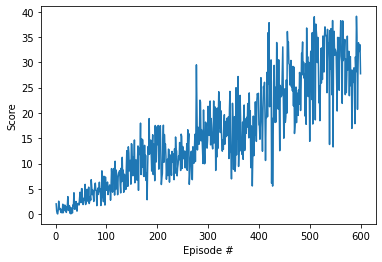

In [12]:
plot_scores(best_scores)

The environment was solved with the DDPG algorithm in 500 episodes.

<strong>Model Architecture:</strong><br>
2 Actor Networks with 4 linear layers:<br>
Linear layer 1: 33 x 600<br>
Linear layer 2: 600 x 400<br>
Linear layer 3: 400 x 200<br>
Linear layer 4: 200 x 4<br>

2 Critic Networks with 3 linear layers:<br>
Linear layer 1: 33 x 400<br>
Linear layer 2: (400+4) x 300<br>
Linear layer 3: 300 x 1<br>

<strong>Hyperparameters:</strong><br>
Learning rate actor: 0.00015<br>
Learning rate critic: 0.00015<br>
Gamma: 0.99<br>
Buffer size: 100000<br>
Batch size: 128<br>
Tau: 0.001<br>
Weight decay: 0.0001<br>

<strong>Improvement</strong><br>
The model performance could possibly improved through batch normalization or dropout layers.

### 5. Close the environment

In [14]:
env.close()